<a href="https://colab.research.google.com/github/saurater/ciencia_de_dados/blob/main/ML_Regress%C3%A3o_Log%C3%ADsitca_em_R_na_Unha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning - Regressão Logística em R
**IGTI - Cientista de Dados - Prof. Máiron Chaves**

**Notas: Sam Faraday**

# 1. Limpar Memória 
(no R Studio somente)

In [76]:
rm(list = ls()) #Limpa memória do R

# 2. Instala e carrega biblioteca para gerar a curva ROC

In [77]:
install.packages("pROC") #Instala


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [78]:
library(pROC) #Carrega

# 3. Carrega a  library dplyr para análises de dados

In [79]:
library(dplyr)

# 4. Monte o dataset

In [80]:
dados <- data.frame(Prova_Logica = c(2, 2, 5, 5, 5, 2, 3, 2, 1, 4,
5, 8, 1, 1, 3, 4, 3, 2, 1, 1, 8, 8, 1, 2, 1, 5, 3, 3, 5, 4, 4,
1, 8, 3, 2, 3, 3, 2, 1, 1, 5, 4, 1, 5, 3, 1, 4, 6, 1, 1, 8, 1,
1, 5, 1, 5, 3, 1, 1, 8, 1, 1, 1, 1, 1, 2, 1, 5, 5, 4, 2, 1, 8,
4, 5, 1, 3, 3, 3, 5, 3, 1, 7, 1, 1, 2, 9, 5, 3, 1, 5, 1, 4, 2,
1, 4, 3, 3, 8, 1, 1, 8, 5, 1, 1, 1, 5, 8, 5, 1, 4, 2, 5, 4, 5,
3, 3, 5, 5, 5, 5, 5, 8, 5, 4, 9, 8, 1, 3, 4, 2, 5, 1, 4, 3, 5,
5, 5, 6, 4, 3, 5, 7, 1, 8, 5, 7, 3, 2, 3, 2, 5, 5, 5, 5, 4, 4,
8, 1, 1, 2, 5, 3, 2, 7, 4, 1, 1, 1, 4, 5, 1, 1, 8, 3, 6, 8, 3,
1, 3, 3, 2, 8, 4, 1, 1, 1, 1, 1, 2, 3, 4, 6, 2, 3, 3, 4, 2, 1,
5, 2, 4, 3, 3, 1, 3, 3, 3, 1, 3, 5, 6, 1, 5, 1, 5, 4, 3, 1, 6,
1, 4, 9, 3, 3, 2, 1, 1, 4, 3, 1, 3, 1, 1, 3, 7, 8, 1, 3, 5, 6,
3, 6, 5, 8, 5, 1, 1, 4, 2, 1, 8, 7, 5, 1, 1, 1, 6, 5, 7, 3, 3,
5, 1, 3, 5, 1, 8, 8, 1, 2, 3, 3, 3, 3, 7, 1, 9, 8, 4, 1, 7, 1,
1, 1, 5, 1, 1, 5, 3, 5, 1, 3, 6, 2, 1, 3, 4, 5, 6, 1, 5, 1, 5,
1, 1, 5, 1, 1, 1, 5, 1, 3, 7, 1, 4, 3, 7, 1, 1, 5, 4, 1, 1, 3,
5, 4, 2, 1, 5, 1, 1, 1, 8, 8, 5, 1, 2, 1, 6, 8, 3, 1, 5, 1, 5,
1, 4, 4, 8, 1, 1, 1, 5, 1, 1, 5, 4, 6, 8, 1, 3, 1, 6, 1, 1, 1,
1, 1, 8, 1, 5, 3, 1, 4, 4, 7, 2, 3, 3, 5, 8, 3, 1, 4, 1, 5, 1,
7, 2, 6, 4, 1, 3, 1, 8, 5, 5, 5, 3, 1, 4, 5, 3, 6, 1, 3, 3, 5,
4, 5, 3, 1, 4, 5, 1, 3, 6, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 5, 4,
8, 1, 5, 6, 6, 4, 2, 5, 5, 6, 1, 2, 5, 6, 4, 2, 1, 2, 7, 2, 8,
1, 3, 1, 1, 1, 6, 1, 4, 3, 1, 5, 2, 1, 1, 5, 4, 3, 1, 3, 1, 1,
2, 4, 5, 4, 5, 4, 3, 7, 4, 1, 7, 1, 8, 5, 3, 3, 5, 1, 2, 1, 5,
4, 4, 4, 3, 6, 8, 8, 1, 1, 1, 8, 8, 1, 5, 1, 4, 5, 1, 4, 1, 4,
1, 5, 1, 4, 4, 1, 1, 2, 5, 1, 4, 4, 5, 4, 1, 1, 5, 3, 5, 4, 1,
1, 5, 3, 3, 1, 5, 5, 4, 5, 7, 2, 5, 9, 4, 6, 1, 1, 1, 1, 8, 7,
2, 3, 2, 9, 3, 1, 5, 1, 3, 5, 1, 4, 6, 3, 1, 5, 1, 3, 9, 1, 4,
8, 8, 1, 3, 2, 3, 3, 1, 5, 1, 1, 3, 1, 5, 3, 4, 3, 4, 1, 4, 3,
5, 1, 5, 2, 5, 8, 9, 4, 7, 4, 8, 5, 7, 5, 3, 5, 6, 3, 1, 5, 6,
4, 3, 5, 1, 2, 4, 1, 1, 2, 9, 5, 1, 5, 1, 2, 1, 5, 1, 2, 3, 5,
1, 1, 5, 3, 9, 5, 6, 9, 6, 1, 1, 9, 1, 3, 5, 4, 8, 4, 2, 7, 1,
6, 3, 7, 8, 1, 5, 5, 6, 1, 4, 4, 3, 1, 5, 5, 8, 3, 3, 1, 9, 5,
5, 5, 5, 1, 9, 6, 3, 1, 1, 2, 4, 6, 5, 7, 6, 5, 1), 
Redacao = c(1,
1, 1, 4, 3, 3, 5, 5, 9, 1, 1, 1, 1, 1, 4, 3, 3, 1, 1, 1, 1, 7,
1, 1, 8, 1, 1, 1, 3, 8, 3, 1, 5, 3, 3, 1, 2, 7, 1, 1, 1, 1, 1,
1, 7, 1, 1, 8, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 8, 5,
1, 1, 1, 1, 1, 2, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 4, 1, 8, 5, 1,
5, 8, 1, 1, 1, 5, 1, 1, 1, 2, 3, 3, 1, 3, 8, 1, 4, 6, 1, 1, 1,
1, 3, 1, 1, 2, 3, 2, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 8, 1, 5,
1, 1, 1, 1, 1, 3, 6, 1, 2, 5, 6, 1, 2, 2, 1, 8, 1, 4, 6, 9, 3,
1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1,
1, 3, 5, 1, 1, 1, 1, 3, 1, 4, 1, 1, 1, 2, 1, 3, 1, 1, 1, 4, 5,
1, 1, 6, 1, 3, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3,
6, 1, 8, 1, 1, 5, 1, 8, 2, 6, 1, 5, 1, 6, 1, 1, 1, 1, 1, 1, 1,
1, 3, 1, 4, 8, 1, 1, 1, 8, 1, 3, 1, 6, 3, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1, 1, 1, 5, 1, 1, 3, 1, 1, 7, 4, 1, 1, 1, 1, 6, 1, 3,
1, 4, 1, 1, 7, 2, 6, 4, 1, 1, 1, 1, 1, 4, 7, 1, 3, 1, 1, 9, 1,
1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 3, 2, 1, 1, 1, 5, 3, 1,
1, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 8, 1, 7, 1,
1, 3, 8, 1, 1, 1, 1, 1, 4, 1, 1, 1, 2, 2, 7, 1, 3, 1, 1, 1, 4,
2, 4, 2, 2, 5, 3, 1, 1, 1, 5, 1, 9, 1, 1, 3, 2, 1, 1, 5, 1, 2,
1, 3, 8, 1, 5, 1, 4, 3, 1, 8, 1, 6, 5, 1, 1, 1, 1, 1, 4, 5, 1,
7, 8, 1, 4, 1, 1, 1, 1, 4, 1, 1, 2, 1, 8, 2, 6, 2, 1, 4, 1, 1,
1, 1, 1, 4, 1, 1, 1, 1, 1, 8, 1, 1, 1, 3, 1, 1, 1, 8, 1, 1, 1,
3, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1,
3, 1, 2, 7, 2, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 3, 1, 1, 5, 1,
7, 1, 1, 1, 3, 6, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 6, 8, 8, 7, 2,
1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 9, 1, 8, 1, 1, 2,
4, 1, 1, 6, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 6, 1, 2,
1, 1, 5, 4, 1, 8, 4, 6, 6, 1, 1, 1, 9, 1, 1, 1, 1, 1, 8, 1, 1,
1, 1, 1, 3, 1, 1, 4, 1, 1, 3, 4, 1, 1, 3, 2, 3, 1, 2, 1, 1, 1,
1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 4, 1, 4, 2, 1, 6, 1,
4, 2, 2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 6, 1, 1, 1, 3, 2, 8, 1, 1,
1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 6, 1, 6, 7, 1, 1, 5, 1, 2, 5,
1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 8, 7, 1, 1, 1, 1, 4, 1, 6, 1,
2, 8, 4, 7, 1, 1, 1, 5, 1, 1, 2, 1, 1, 7, 1, 1, 1, 4, 1, 1, 3,
1, 5, 1, 7, 1), Auto_Avaliacao = c(1, 1, 1, 1, 1, 1, 1, 7, 1,
1, 1, 9, 1, 1, 1, 3, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1, 3, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 8, 1, 1, 9, 7, 1, 2,
1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 3, 8, 1, 1, 1, 1, 1, 1, 6, 1, 1,
1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 8, 3, 1, 6, 1, 6, 1, 1, 3, 1, 1,
1, 1, 8, 5, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 6, 1, 2, 1, 1, 1, 1,
1, 4, 1, 6, 1, 1, 1, 2, 3, 1, 4, 7, 6, 1, 1, 1, 1, 1, 1, 9, 1,
2, 1, 1, 1, 1, 2, 1, 8, 1, 8, 1, 3, 2, 1, 1, 1, 1, 2, 6, 1, 1,
1, 2, 1, 3, 1, 1, 8, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9,
1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 1, 3, 5, 1, 1, 1, 1, 1, 1, 3, 1,
1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 6, 1, 8, 1, 2, 5, 2, 1,
1, 7, 1, 1, 1, 8, 1, 1, 5, 1, 1, 1, 3, 1, 1, 1, 9, 1, 1, 1, 5,
9, 1, 5, 3, 4, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 3, 3, 1, 3, 1,
1, 1, 1, 1, 1, 3, 8, 1, 4, 1, 4, 1, 1, 1, 6, 1, 3, 1, 1, 2, 3,
1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 2, 2, 8, 1, 1, 1, 1, 1, 4, 1,
1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 4, 3, 1, 1, 4, 1, 6, 2, 1, 5, 3,
1, 1, 2, 1, 1, 1, 1, 1, 1, 8, 3, 4, 8, 1, 3, 7, 7, 1, 1, 2, 1,
1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 9, 1, 1, 1,
1, 8, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 9, 6, 3, 3,
1, 2, 1, 8, 7, 1, 1, 1, 1, 1, 6, 3, 1, 4, 5, 1, 6, 1, 1, 1, 1,
3, 1, 1, 2, 1, 6, 3, 7, 1, 8, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 8, 1, 1, 1, 9, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 2,
1, 1, 1, 2, 1, 7, 1, 1, 4, 2, 1, 5, 1, 5, 1, 1, 1, 4, 6, 1, 1,
4, 1, 2, 1, 1, 1, 9, 8, 1, 9, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
1, 1, 4, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 3, 1, 1, 8, 1, 1, 6, 1,
1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 5, 1, 6, 3, 1, 4, 3, 1, 7, 5, 1,
1, 1, 1, 1, 1, 2, 1, 5, 9, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 8, 1,
1, 2, 5, 1, 1, 5, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 5, 1, 8, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1, 6, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
1, 1, 1, 6, 1, 9, 5, 3, 1, 8, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2,
1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1, 2, 8, 1, 1, 1, 6, 1, 1, 1, 1, 9, 1, 1, 1),
Classe = c("Ruim",
"Ruim", "Ruim", "Boa", "Ruim", "Ruim", "Boa", "Boa", "Boa", "Ruim",
"Ruim", "Boa", "Ruim", "Ruim", "Boa", "Ruim", "Ruim", "Ruim",
"Ruim", "Ruim", "Boa", "Boa", "Ruim", "Ruim", "Boa", "Ruim",
"Ruim", "Ruim", "Boa", "Boa", "Ruim", "Ruim", "Boa", "Boa", "Ruim",
"Ruim", "Ruim", "Boa", "Ruim", "Ruim", "Boa", "Ruim", "Ruim",
"Ruim", "Boa", "Ruim", "Ruim", "Boa", "Boa", "Ruim", "Boa", "Ruim",
"Ruim", "Ruim", "Ruim", "Ruim", "Ruim", "Ruim", "Ruim", "Boa",
"Boa", "Boa", "Boa", "Boa", "Ruim", "Ruim", "Ruim", "Ruim", "Ruim",
"Boa", "Ruim", "Boa", "Boa", "Ruim", "Ruim", "Ruim", "Ruim",
"Ruim", "Ruim", "Ruim", "Boa", "Ruim", "Boa", "Boa", "Ruim",
"Boa", "Boa", "Boa", "Ruim", "Ruim", "Boa", "Ruim", "Ruim", "Ruim",
"Ruim", "Ruim", "Ruim", "Boa", "Boa", "Boa", "Ruim", "Ruim",
"Boa", "Ruim", "Ruim", "Ruim", "Ruim", "Boa", "Boa", "Boa", "Ruim",
"Ruim", "Ruim", "Ruim", "Ruim", "Boa", "Ruim", "Ruim", "Ruim",
"Ruim", "Boa", "Ruim", "Boa", "Ruim", "Boa", "Boa", "Boa", "Ruim",
"Ruim", "Boa", "Ruim", "Ruim", "Boa", "Ruim", "Ruim", "Ruim",
"Boa", "Boa", "Boa", "Ruim", "Ruim", "Ruim", "Boa", "Ruim", "Ruim",
"Boa", "Boa", "Ruim", "Ruim", "Ruim", "Ruim", "Ruim", "Ruim",
"Boa", "Ruim", "Ruim", "Ruim", "Boa", "Ruim", "Ruim", "Ruim",
"Ruim", "Ruim", "Ruim", "Boa", "Boa", "Ruim", "Ruim", "Ruim",
"Ruim", "Ruim", "Boa", "Boa", "Boa", "Ruim", "Boa", "Boa", "Ruim",
"Boa", "Ruim", "Ruim", "Ruim", "Ruim", "Ruim", "Boa", "Ruim",
"Ruim", "Ruim", "Boa", "Boa", "Ruim", "Ruim", "Boa", "Ruim",
"Ruim", "Ruim", "Ruim", "Ruim", "Ruim", "Ruim", "Ruim", "Ruim",
"Ruim", "Ruim", "Ruim", "Ruim", "Ruim", "Ruim", "Ruim", "Ruim",
"Boa", "Boa", "Ruim", "Boa", "Ruim", "Ruim", "Boa", "Ruim", "Boa",
"Ruim", "Boa", "Ruim", "Boa", "Ruim", "Boa", "Ruim", "Ruim",
"Boa", "Ruim", "Ruim", "Ruim", "Ruim", "Ruim", "Boa", "Ruim",
"Boa", "Boa", "Ruim", "Ruim", "Boa", "Boa", "Ruim", "Ruim", "Ruim",
"Boa", "Ruim", "Ruim", "Ruim", "Ruim", "Ruim", "Ruim", "Boa",
"Ruim", "Ruim", "Ruim", "Ruim", "Ruim", "Boa", "Ruim", "Boa",
"Ruim", "Ruim", "Boa", "Ruim", "Ruim", "Boa", "Boa", "Boa", "Boa",
"Boa", "Ruim", "Boa", "Ruim", "Ruim", "Ruim", "Boa", "Ruim",
"Boa", "Boa", "Ruim", "Boa", "Boa", "Ruim", "Ruim", "Ruim", "Ruim",
"Ruim", "Boa", "Boa", "Ruim", "Boa", "Ruim", "Ruim", "Ruim",
"Ruim", "Boa", "Ruim", "Ruim", "Ruim", "Boa", "Boa", "Boa", "Ruim",
"Ruim", "Ruim", "Boa", "Ruim", "Ruim", "Ruim", "Ruim", "Ruim",
"Ruim", "Ruim", "Boa", "Ruim", "Ruim", "Ruim", "Boa", "Ruim",
"Boa", "Ruim", "Boa", "Boa", "Boa", "Ruim", "Ruim", "Ruim", "Ruim",
"Ruim", "Ruim", "Ruim", "Ruim", "Boa", "Boa", "Boa", "Ruim",
"Boa", "Ruim", "Boa", "Ruim", "Boa", "Ruim", "Ruim", "Ruim",
"Ruim", "Boa", "Ruim", "Ruim", "Ruim", "Boa", "Ruim", "Boa",
"Ruim", "Ruim", "Boa", "Ruim", "Ruim", "Ruim", "Ruim", "Boa",
"Ruim", "Ruim", "Boa", "Ruim", "Ruim", "Boa", "Ruim", "Boa",
"Ruim", "Boa", "Ruim", "Ruim", "Boa", "Ruim", "Ruim", "Ruim",
"Boa", "Ruim", "Ruim", "Ruim", "Ruim", "Boa", "Ruim", "Boa",
"Ruim", "Boa", "Boa", "Ruim", "Boa", "Ruim", "Ruim", "Boa", "Ruim",
"Ruim", "Boa", "Boa", "Ruim", "Boa", "Boa", "Ruim", "Boa", "Boa",
"Ruim", "Ruim", "Ruim", "Ruim", "Ruim", "Ruim", "Boa", "Ruim",
"Ruim", "Ruim", "Ruim", "Boa", "Ruim", "Boa", "Ruim", "Boa",
"Boa", "Ruim", "Ruim", "Ruim", "Ruim", "Ruim", "Boa", "Ruim",
"Ruim", "Ruim", "Ruim", "Ruim", "Boa", "Ruim", "Ruim", "Ruim",
"Boa", "Ruim", "Ruim", "Ruim", "Boa", "Ruim", "Ruim", "Ruim",
"Ruim", "Boa", "Ruim", "Ruim", "Ruim", "Ruim", "Boa", "Ruim",
"Boa", "Ruim", "Ruim", "Ruim", "Boa", "Ruim", "Ruim", "Ruim",
"Ruim", "Ruim", "Ruim", "Ruim", "Ruim", "Boa", "Ruim", "Boa",
"Boa", "Ruim", "Ruim", "Ruim", "Ruim", "Ruim", "Ruim", "Ruim",
"Ruim", "Ruim", "Ruim", "Ruim", "Ruim", "Boa", "Ruim", "Ruim",
"Boa", "Ruim", "Boa", "Ruim", "Ruim", "Ruim", "Boa", "Boa", "Ruim",
"Ruim", "Boa", "Ruim", "Ruim", "Ruim", "Ruim", "Ruim", "Boa",
"Boa", "Boa", "Boa", "Boa", "Boa", "Boa", "Ruim", "Ruim", "Ruim",
"Ruim", "Ruim", "Boa", "Ruim", "Boa", "Ruim", "Ruim", "Boa",
"Ruim", "Ruim", "Ruim", "Ruim", "Boa", "Ruim", "Boa", "Ruim",
"Ruim", "Ruim", "Ruim", "Ruim", "Ruim", "Boa", "Ruim", "Ruim",
"Boa", "Ruim", "Ruim", "Ruim", "Ruim", "Ruim", "Ruim", "Boa",
"Boa", "Ruim", "Ruim", "Ruim", "Boa", "Ruim", "Boa", "Boa", "Ruim",
"Boa", "Boa", "Ruim", "Boa", "Boa", "Boa", "Boa", "Ruim", "Ruim",
"Ruim", "Boa", "Ruim", "Ruim", "Boa", "Boa", "Ruim", "Boa", "Ruim",
"Ruim", "Boa", "Ruim", "Boa", "Boa", "Boa", "Ruim", "Boa", "Ruim",
"Ruim", "Ruim", "Boa", "Ruim", "Ruim", "Boa", "Ruim", "Boa",
"Ruim", "Ruim", "Ruim", "Ruim", "Ruim", "Boa", "Ruim", "Ruim",
"Ruim", "Ruim", "Ruim", "Boa", "Ruim", "Ruim", "Ruim", "Ruim",
"Ruim", "Ruim", "Boa", "Boa", "Boa", "Ruim", "Boa", "Ruim", "Boa",
"Ruim", "Boa", "Ruim", "Ruim", "Ruim", "Ruim", "Ruim", "Boa",
"Ruim", "Ruim", "Ruim", "Ruim", "Boa", "Boa", "Ruim", "Ruim",
"Ruim", "Ruim", "Ruim", "Boa", "Ruim", "Ruim", "Ruim", "Boa",
"Ruim", "Ruim", "Ruim", "Ruim", "Ruim", "Ruim", "Boa", "Ruim",
"Ruim", "Boa", "Ruim", "Boa", "Boa", "Boa", "Boa", "Boa", "Boa",
"Ruim", "Boa", "Ruim", "Ruim", "Ruim", "Ruim", "Boa", "Ruim",
"Ruim", "Boa", "Ruim", "Ruim", "Ruim", "Boa", "Boa", "Ruim",
"Ruim", "Ruim", "Boa", "Boa", "Ruim", "Boa", "Ruim", "Ruim",
"Boa", "Boa", "Boa", "Ruim", "Ruim", "Ruim", "Boa", "Ruim", "Ruim",
"Ruim", "Ruim", "Ruim", "Boa", "Ruim", "Boa", "Ruim", "Boa",
"Ruim", "Ruim", "Boa", "Ruim", "Boa", "Boa", "Boa", "Ruim"))

# 5. Visualizar os Dados

In [81]:
View(dados)

Prova_Logica,Redacao,Auto_Avaliacao,Classe
<dbl>,<dbl>,<dbl>,<chr>
2,1,1,Ruim
2,1,1,Ruim
5,1,1,Ruim
5,4,1,Boa
5,3,1,Ruim
2,3,1,Ruim
3,5,1,Boa
2,5,7,Boa
1,9,1,Boa


# 6.  ATENÇÂO AQUI
#Converte variável resposta para factor 

**Nota do Sam** Leia a Ajuda após executar o código abaixo


In [82]:
##Nota do Sam: Para exibir a ajuda para uma palavra-chave, basta precedê-la por um ponto de interrogação
?factor

In [83]:
# Antes de ser convertidade em factor, ela é do tipo character
#Nota do Sam:
typeof(dados$Classe)

[1] "character"

In [84]:
#converte para factor
dados$Classe <- factor(dados$Classe, levels = c('Ruim','Boa'))

In [85]:
# Após ser convertidade em factor, ela passa a ser do tipo integer
#Nota do Sam:
typeof(dados$Classe)

[1] "integer"

# 7. Exibir as Quantidade por Classes 
com o comando table

**Nota do Sam:**

In [86]:
table(dados$Classe)


Ruim  Boa 
 458  241 

# 8. Pequena Análise Exploratória
**Nota do Sam:** Requer a library dplyr


In [87]:
dados %>% group_by(Classe) %>% summarise_all("mean")

Classe,Prova_Logica,Redacao,Auto_Avaliacao
<fct>,<dbl>,<dbl>,<dbl>
Ruim,2.956332,1.325328,1.290393
Boa,4.622407,4.070539,3.585062


#9. Ajusta Regressão Logística - Cria o Modelo de Machine Learning
glm

**Nota do Sam:** Troquei a palavra fit do exercício por meu_modelo para não confundir com palavras reservdas


In [88]:
?glm


In [89]:
meu_modelo <- glm(Classe ~ Prova_Logica + Redacao + Auto_Avaliacao , data = dados, family = binomial)

# 10. Visualiza Resumo do Modelo Ajustado


In [90]:
summary(meu_modelo)


Call:
glm(formula = Classe ~ Prova_Logica + Redacao + Auto_Avaliacao, 
    family = binomial, data = dados)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.4470  -0.5346  -0.3941   0.2987   2.2777  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -3.84584    0.27818 -13.825  < 2e-16 ***
Prova_Logica    0.21431    0.05186   4.132 3.59e-05 ***
Redacao         0.69144    0.07437   9.298  < 2e-16 ***
Auto_Avaliacao  0.42384    0.06730   6.298 3.02e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 900.53  on 698  degrees of freedom
Residual deviance: 526.77  on 695  degrees of freedom
AIC: 534.77

Number of Fisher Scoring iterations: 5


# 11. Aplica Exponenciacão nos Coeficientes para interpretar
**Nota do Sam:** Eleva a constante de [Euler](https://pt.wikipedia.org/wiki/E_(constante_matem%C3%A1tica)) (2,718281828459045235360287) a cada Beta de regressão

**tipo:** 2.718281828459045235360287 ** 0.21431 (1.2390092194707 da Prova Lógica)


In [91]:
 2.718281828459045235360287 ** 0.21431 

[1] 1.239007

In [92]:
exp(meu_modelo$coefficients)

(Intercept)   Prova_Logica        Redacao Auto_Avaliacao 
    0.02136846     1.23900922     1.99658084     1.52781739

# 12. [Curva ROC](https://pt.wikipedia.org/wiki/Caracter%C3%ADstica_de_Opera%C3%A7%C3%A3o_do_Receptor) 

Setting levels: control = Ruim, case = Boa

Setting direction: controls < cases



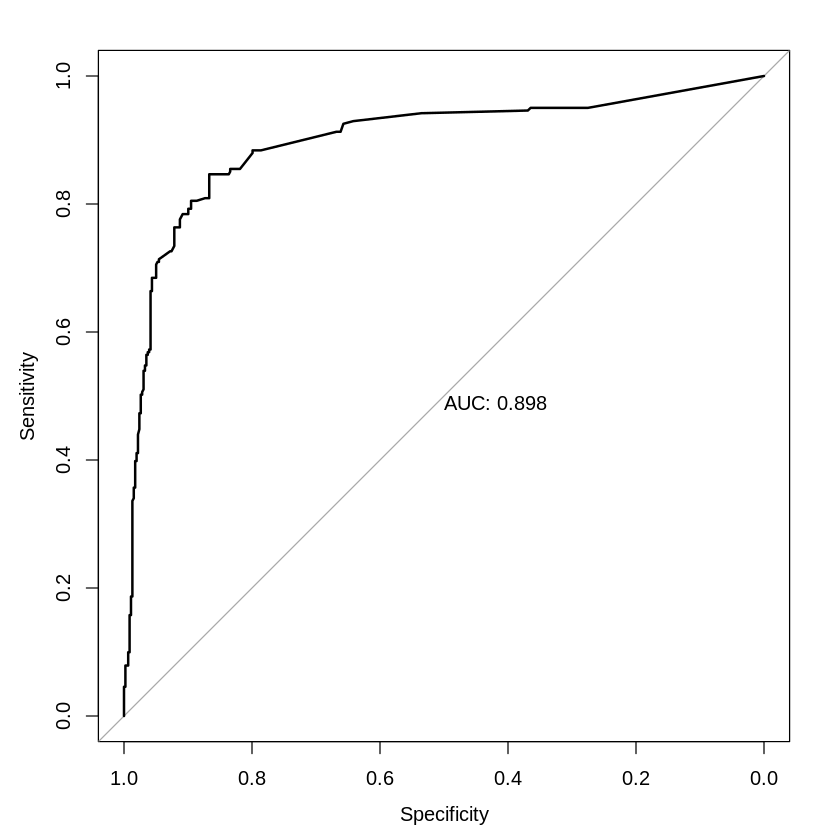

In [93]:
prob = predict(meu_modelo, newdata = dados, type = "response")
roc = roc(dados$Classe ~ prob, plot = TRUE, print.auc = TRUE)

# 13. Obtém a Predição/Probabilidade para Cada Observacao


In [94]:
Probabilidade <- predict(meu_modelo, newdata= dados,type = 'response')
Probabilidade #Nota do Sam: Compare 1 e a 8 abaixo e veja no próximo comomando abaixo colo ele classificou

1          2          3          4          5          6          7 
0.09096250 0.09096250 0.15989589 0.60235935 0.43140265 0.28514808 0.66331842 
         8          9         10         11         12         13         14 
0.95288247 0.95325780 0.13315862 0.15989589 0.91487406 0.07472674 0.07472674 
        15         16         17         18         19         20         21 
0.49667040 0.58837159 0.80446627 0.09096250 0.07472674 0.07472674 0.26579425 
        22         23         24         25         26         27         28 
0.95821561 0.07472674 0.09096250 0.91082921 0.15989589 0.11030524 0.11030524 
        29         30         31         32         33         34         35 
0.43140265 0.95104864 0.37978929 0.07472674 0.93069136 0.33075889 0.28514808 
        36         37         38         39         40         41         42 
0.11030524 0.19842126 0.99471403 0.07472674 0.07472674 0.15989589 0.13315862 
        43         44         45         46         47         48         49 
0.07472674 0.15989589 0.99348991 0.07472674 0.13315862 0.99887189 0.98486369 
        50         51         52         53         54         55         56 
0.07472674 0.35612413 0.07472674 0.07472674 0.15989589 0.07472674 0.15989589 
        57         58         59         60         61         62         63 
0.11030524 0.07472674 0.07472674 0.82156318 0.56205182 0.15861483 0.99498694 
        64         65         66         67         68         69         70 
0.56205182 0.07472674 0.09096250 0.07472674 0.15989589 0.15989589 0.71855841 
        71         72         73         74         75         76         77 
0.09096250 0.07472674 0.91990919 0.19008241 0.15989589 0.07472674 0.11030524 
        78         79         80         81         82         83         84 
0.11030524 0.11030524 0.15989589 0.69727641 0.07472674 0.99860930 0.74973019 
        85         86         87         88         89         90         91 
0.07472674 0.92975986 0.98267790 0.61306113 0.11030524 0.07472674 0.87592801 
        92         93         94         95         96         97         98 
0.07472674 0.13315862 0.09096250 0.13885712 0.92247348 0.72920760 0.22444527 
        99        100        101        102        103        104        105 
0.77109170 0.91082921 0.07472674 0.87056031 0.85792697 0.07472674 0.07472674 
       106        107        108        109        110        111        112 
0.07472674 0.15989589 0.92315497 0.15989589 0.10983663 0.23471455 0.28514808 
       113        114        115        116        117        118        119 
0.27536576 0.13315862 0.15989589 0.30659077 0.11030524 0.92652572 0.15989589 
       120        121        122        123        124        125        126 
0.15989589 0.15989589 0.22527910 0.87056031 0.15989589 0.98577264 0.85085038 
       127        128        129        130        131        132        133 
0.97954536 0.07472674 0.11030524 0.13315862 0.09096250 0.15989589 0.24353809 
       134        135        136        137        138        139        140 
0.99313607 0.11030524 0.36732110 0.75152115 0.85792697 0.19081999 0.23471455 
       141        142        143        144        145        146        147 
0.27441221 0.15989589 0.99860930 0.07472674 0.98245220 0.85792697 0.99422710 
       148        149        150        151        152        153        154 
0.43022957 0.09096250 0.11030524 0.09096250 0.15989589 0.22527910 0.61306113 
       155        156        157        158        159        160        161 
0.15989589 0.13315862 0.13315862 0.97225035 0.07472674 0.15861483 0.09096250 
       162        163        164        165        166        167        168 
0.15989589 0.70666765 0.09096250 0.97064000 0.13315862 0.07472674 0.07472674 
       169        170        171        172        173        174        175 
0.07472674 0.13315862 0.43140265 0.56205182 0.07472674 0.26579425 0.11030524 
       176        177        178        179        180        181        182 
0.19081999 0.97719100 0.1103052

# 14. Cria um vetor Classe Predita para Classificar em Ruim ou Boa

In [95]:
Classe_Predita = '1'
Classe_Predita

[1] "1"

In [96]:
# Nota do Sam
#Se a probabilidade for maior que 50% classifica como 'Boa'
# Em uma única Linha, R varre a o Vetor Probabilidade
#  Compara cada índice, 
#  Se for Maior que 0.5, classifica como Boa, caso contrário, como Ruim
#  Faz um append no Vetor Classe_Predita
# Muito louco esse R. Noutras Linguagens teríamos de 
#   ter criados algumas variáveis, 
#   feito loop
#   comparado cada índice
# pra depois fazer um append 
Classe_Predita <- ifelse(Probabilidade > 0.5,"Boa","Ruim")

Classe_Predita

1      2      3      4      5      6      7      8      9     10     11 
"Ruim" "Ruim" "Ruim"  "Boa" "Ruim" "Ruim"  "Boa"  "Boa"  "Boa" "Ruim" "Ruim" 
    12     13     14     15     16     17     18     19     20     21     22 
 "Boa" "Ruim" "Ruim" "Ruim"  "Boa"  "Boa" "Ruim" "Ruim" "Ruim" "Ruim"  "Boa" 
    23     24     25     26     27     28     29     30     31     32     33 
"Ruim" "Ruim"  "Boa" "Ruim" "Ruim" "Ruim" "Ruim"  "Boa" "Ruim" "Ruim"  "Boa" 
    34     35     36     37     38     39     40     41     42     43     44 
"Ruim" "Ruim" "Ruim" "Ruim"  "Boa" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" 
    45     46     47     48     49     50     51     52     53     54     55 
 "Boa" "Ruim" "Ruim"  "Boa"  "Boa" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" 
    56     57     58     59     60     61     62     63     64     65     66 
"Ruim" "Ruim" "Ruim" "Ruim"  "Boa"  "Boa" "Ruim"  "Boa"  "Boa" "Ruim" "Ruim" 
    67     68     69     70     71     72     73     74     75     76     77 
"Ruim" "Ruim" "Ruim"  "Boa" "Ruim" "Ruim"  "Boa" "Ruim" "Ruim" "Ruim" "Ruim" 
    78     79     80     81     82     83     84     85     86     87     88 
"Ruim" "Ruim" "Ruim"  "Boa" "Ruim"  "Boa"  "Boa" "Ruim"  "Boa"  "Boa"  "Boa" 
    89     90     91     92     93     94     95     96     97     98     99 
"Ruim" "Ruim"  "Boa" "Ruim" "Ruim" "Ruim" "Ruim"  "Boa"  "Boa" "Ruim"  "Boa" 
   100    101    102    103    104    105    106    107    108    109    110 
 "Boa" "Ruim"  "Boa"  "Boa" "Ruim" "Ruim" "Ruim" "Ruim"  "Boa" "Ruim" "Ruim" 
   111    112    113    114    115    116    117    118    119    120    121 
"Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim"  "Boa" "Ruim" "Ruim" "Ruim" 
   122    123    124    125    126    127    128    129    130    131    132 
"Ruim"  "Boa" "Ruim"  "Boa"  "Boa"  "Boa" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" 
   133    134    135    136    137    138    139    140    141    142    143 
"Ruim"  "Boa" "Ruim" "Ruim"  "Boa"  "Boa" "Ruim" "Ruim" "Ruim" "Ruim"  "Boa" 
   144    145    146    147    148    149    150    151    152    153    154 
"Ruim"  "Boa"  "Boa"  "Boa" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim"  "Boa" 
   155    156    157    158    159    160    161    162    163    164    165 
"Ruim" "Ruim" "Ruim"  "Boa" "Ruim" "Ruim" "Ruim" "Ruim"  "Boa" "Ruim"  "Boa" 
   166    167    168    169    170    171    172    173    174    175    176 
"Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim"  "Boa" "Ruim" "Ruim" "Ruim" "Ruim" 
   177    178    179    180    181    182    183    184    185    186    187 
 "Boa" "Ruim"  "Boa" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim"  "Boa" "Ruim" "Ruim" 
   188    189    190    191    192    193    194    195    196    197    198 
"Ruim"  "Boa"  "Boa" "Ruim" "Ruim"  "Boa" "Ruim" "Ruim" "Ruim"  "Boa" "Ruim" 
   199    200    201    202    203    204    205    206    207    208    209 
"Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" 
   210    211    212    213    214    215    216    217    218    219    220 
"Ruim"  "Boa"  "Boa" "Ruim"  "Boa" "Ruim" "Ruim"  "Boa" "Ruim"  "Boa" "Ruim" 
   221    222    223    224    225    226    227    228    229    230    231 
 "Boa" "Ruim"  "Boa" "Ruim"  "Boa" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" 
   232    233    234    235    236    237    238    239    240    241    242 
"Ruim" "Ruim" "Ruim" "Ruim"  "Boa"  "Boa" "Ruim" "Ruim"  "Boa"  "Boa" "Ruim" 
   243    244    245    246    247    248    249    250    251    252    253 
 "Boa" "Ruim"  "Boa" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim"  "Boa" "Ruim" 
   254    255    256    257    258    259    260    261    262    263    264 
"Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim"  "Boa" "Ruim" "Ruim" "Ruim" "Ruim" 
   265    266    267    268    269    270    271    272    273    274    275 
"Ruim"  "Boa"  "Boa"  "Boa" "Ruim" "Ruim" "Ruim"  "Boa" "Ruim" "Ruim" "Ruim" 
   276    277    278    279    280    281    282    283    284    285    286 
 "Boa" "Ruim"  "Boa"  "Boa"

# 15. Visualiza o data frame com as Predições
**Nota do Sam:** Veja que, diferente dos outros exercícios em que se dá um View apenas nos dados, 

aqui se contatenaram dados, Probabilidade e Classe_Predita em um único View


In [97]:
View(data.frame(dados,Probabilidade,Classe_Predita))

,Prova_Logica,Redacao,Auto_Avaliacao,Classe,Probabilidade,Classe_Predita
,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<chr>
1,2,1,1,Ruim,0.09096250,Ruim
2,2,1,1,Ruim,0.09096250,Ruim
3,5,1,1,Ruim,0.15989589,Ruim
4,5,4,1,Boa,0.60235935,Boa
5,5,3,1,Ruim,0.43140265,Ruim
6,2,3,1,Ruim,0.28514808,Ruim
7,3,5,1,Boa,0.66331842,Boa
8,2,5,7,Boa,0.95288247,Boa
9,1,9,1,Boa,0.95325780,Boa


#15. Gera e exibe a [Matriz de Confusão](https://medium.com/data-hackers/entendendo-o-que-%C3%A9-matriz-de-confus%C3%A3o-com-python-114e683ec509)


In [98]:
matriz_de_confusao <- table(Classe_Predita = Classe_Predita, Classe_Original = relevel(dados$Classe,ref = 'Boa'))
matriz_de_confusao

              Classe_Original
Classe_Predita Boa Ruim
          Boa  169   23
          Ruim  72  435

# 16. Armazena os Valores da [Matriz de Confusão](https://medium.com/data-hackers/entendendo-o-que-%C3%A9-matriz-de-confus%C3%A3o-com-python-114e683ec509)
**Nota do Sam:** Como ela é uma table (class) , podemos acessar seus valores individuais passando o índice de cada um

In [99]:
class(matriz_de_confusao)

[1] "table"

In [100]:
VP_Verdadeiro_Positivo <- matriz_de_confusao[1,1];
VP_Verdadeiro_Positivo

[1] 169

In [101]:
FN_Falso_Negativo <- matriz_de_confusao[2,1];
FN_Falso_Negativo 

[1] 72

In [102]:
VN_Verdadeiro_Negativo <- matriz_de_confusao[2,2];
VN_Verdadeiro_Negativo 

[1] 435

In [103]:
FP_Falso_Positivo <- matriz_de_confusao[1,2];
FP_Falso_Positivo

[1] 23

#17. Calcula a [Acurácia](https://developers.google.com/machine-learning/crash-course/classification/accuracy) 

Taxa de acerto geral (Acurácia)

**Nota do Sam:** 
1. diag extrai a diagonal de uma matriz


In [104]:
?diag

In [105]:
diag(matriz_de_confusao)

Boa Ruim 
 169  435

In [106]:
acuracia <- sum(diag(matriz_de_confusao))/ sum(matriz_de_confusao);

acuracia * 100

[1] 86.40916

#18. Calcula a [Sensitividade (Recall)](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall#recall)
Taxa de acerto para classe positiva (Sensitividade)

In [107]:
sensitividade_recall <- VP_Verdadeiro_Positivo /(VP_Verdadeiro_Positivo+FN_Falso_Negativo) ;

sensitividade_recall * 100

[1] 70.12448

# 19. Calcula a [Especificidade - Precision](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall)

Taxa de acertos para classe negativa (Especificidade).


In [108]:
especificidade <- VN_Verdadeiro_Negativo / (VN_Verdadeiro_Negativo + FP_Falso_Positivo);

especificidade * 100

[1] 94.97817

# 20. Análise de Sensitividade e Especificidade

In [109]:
#sort siginifca ordenar, nesse caso está ordenando a tabela de Probabilidade
limiares <- sort(Probabilidade)
limiares

13         14         19         20         23         32         39 
0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 
        40         43         46         50         52         53         55 
0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 
        58         59         65         67         72         76         82 
0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 
        85         90         92        101        104        105        106 
0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 
       128        144        159        167        168        169        173 
0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 
       186        187        188        199        205        209        213 
0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 
       215        227        231        233        238        247        248 
0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 
       251        255        256        264        277        283        284 
0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 
       285        287        292        301        303        305        308 
0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 
       312        319        329        331        332        343        345 
0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 
       347        353        355        356        365        366        367 
0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 
       369        371        388        393        395        406        413 
0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 
       420        421        423        424        426        428        432 
0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 
       441        447        452        454        456        458        461 
0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 
       465        469        472        482        484        492        506 
0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 
       508        511        515        517        520        524        529 
0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 
       535        536        552        562        567        571        576 
0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 
       580        585        587        588        590        596        600 
0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 
       626        631        633        637        641        642        650 
0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 
       653        661        666        680        690        699          1 
0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.07472674 0.09096250 
         2         18         24         66         71         94        131 
0.09096250 0.09096250 0.09096250 0.09096250 0.09096250 0.09096250 0.09096250 
       149        151        161        164        182        194        198 
0.09096250 0.09096250 0.09096250 0.09096250 0.09096250 0.09096250 0.09096250 
       201        226        250        271        328        338        378 
0.09096250 0.09096250 0.09096250 0.09096250 0.09096250 0.09096250 0.09096250 
       390        437        442        446        448        450        463 
0.09096250 0.09096250 0.09096250 0.09096250 0.09096250 0.09096250 0.09096250 
       473        491        522        546        557        559        624 
0.09096250 0.09096250 0.09096250 0.09096250 0.09096250 0.09096250 0.09096250 
       634        638        659        692        110        471        686 
0.09096250 0.09096250 0.090962

## 21. Cria Listas Vazias

In [110]:
acuracia       <- c()
sensitividade  <- c()
especificidade <- c()


In [111]:
Probabilidade

1          2          3          4          5          6          7 
0.09096250 0.09096250 0.15989589 0.60235935 0.43140265 0.28514808 0.66331842 
         8          9         10         11         12         13         14 
0.95288247 0.95325780 0.13315862 0.15989589 0.91487406 0.07472674 0.07472674 
        15         16         17         18         19         20         21 
0.49667040 0.58837159 0.80446627 0.09096250 0.07472674 0.07472674 0.26579425 
        22         23         24         25         26         27         28 
0.95821561 0.07472674 0.09096250 0.91082921 0.15989589 0.11030524 0.11030524 
        29         30         31         32         33         34         35 
0.43140265 0.95104864 0.37978929 0.07472674 0.93069136 0.33075889 0.28514808 
        36         37         38         39         40         41         42 
0.11030524 0.19842126 0.99471403 0.07472674 0.07472674 0.15989589 0.13315862 
        43         44         45         46         47         48         49 
0.07472674 0.15989589 0.99348991 0.07472674 0.13315862 0.99887189 0.98486369 
        50         51         52         53         54         55         56 
0.07472674 0.35612413 0.07472674 0.07472674 0.15989589 0.07472674 0.15989589 
        57         58         59         60         61         62         63 
0.11030524 0.07472674 0.07472674 0.82156318 0.56205182 0.15861483 0.99498694 
        64         65         66         67         68         69         70 
0.56205182 0.07472674 0.09096250 0.07472674 0.15989589 0.15989589 0.71855841 
        71         72         73         74         75         76         77 
0.09096250 0.07472674 0.91990919 0.19008241 0.15989589 0.07472674 0.11030524 
        78         79         80         81         82         83         84 
0.11030524 0.11030524 0.15989589 0.69727641 0.07472674 0.99860930 0.74973019 
        85         86         87         88         89         90         91 
0.07472674 0.92975986 0.98267790 0.61306113 0.11030524 0.07472674 0.87592801 
        92         93         94         95         96         97         98 
0.07472674 0.13315862 0.09096250 0.13885712 0.92247348 0.72920760 0.22444527 
        99        100        101        102        103        104        105 
0.77109170 0.91082921 0.07472674 0.87056031 0.85792697 0.07472674 0.07472674 
       106        107        108        109        110        111        112 
0.07472674 0.15989589 0.92315497 0.15989589 0.10983663 0.23471455 0.28514808 
       113        114        115        116        117        118        119 
0.27536576 0.13315862 0.15989589 0.30659077 0.11030524 0.92652572 0.15989589 
       120        121        122        123        124        125        126 
0.15989589 0.15989589 0.22527910 0.87056031 0.15989589 0.98577264 0.85085038 
       127        128        129        130        131        132        133 
0.97954536 0.07472674 0.11030524 0.13315862 0.09096250 0.15989589 0.24353809 
       134        135        136        137        138        139        140 
0.99313607 0.11030524 0.36732110 0.75152115 0.85792697 0.19081999 0.23471455 
       141        142        143        144        145        146        147 
0.27441221 0.15989589 0.99860930 0.07472674 0.98245220 0.85792697 0.99422710 
       148        149        150        151        152        153        154 
0.43022957 0.09096250 0.11030524 0.09096250 0.15989589 0.22527910 0.61306113 
       155        156        157        158        159        160        161 
0.15989589 0.13315862 0.13315862 0.97225035 0.07472674 0.15861483 0.09096250 
       162        163        164        165        166        167        168 
0.15989589 0.70666765 0.09096250 0.97064000 0.13315862 0.07472674 0.07472674 
       169        170        171        172        173        174        175 
0.07472674 0.13315862 0.43140265 0.56205182 0.07472674 0.26579425 0.11030524 
       176        177        178        179        180        181        182 
0.19081999 0.97719100 0.1103052

# 23. BUG
A partir desse ponto tem um Bug que ainda não consegui resolver
A sensitividade e a especificidade estão sendo geradas com um único valor

In [112]:
for ( i in 1:length(limiares)) {
  limiar_atual <- limiares[i]

  
  Classe_Predita <- ifelse(Probabilidade > limiar_atual,'Boa' , 'Ruim')

  #Gera matriz de confusao
  confusao <- table(Classe_Predita = Classe_Predita, Classe_Original = relevel(dados$Classe,ref = 'Boa'))


  #Armazena valores da matriz de confusao
  VP_Verdadeiro_Positivo <- matriz_de_confusao[1,1]; VP_Verdadeiro_Positivo

  FN_Falso_Negativo <- matriz_de_confusao[2,1];FN_Falso_Negativo 

  VN_Verdadeiro_Negativo <- matriz_de_confusao[2,2];

  FP_Falso_Positivo <- matriz_de_confusao[1,2];

  #Calcula acuracia
  acuracia[i] <- sum(diag(matriz_de_confusao))/ sum(matriz_de_confusao);
  

  #Calcula Sensitividade
  sensitividade[i] <- VP_Verdadeiro_Positivo /(VP_Verdadeiro_Positivo + FN_Falso_Negativo)

  #Calcula Especificidade
  especificidade[i] <- VN_Verdadeiro_Negativo / (VN_Verdadeiro_Negativo + FP_Falso_Positivo)
  
}

matriz_de_confusao


 

              Classe_Original
Classe_Predita Boa Ruim
          Boa  169   23
          Ruim  72  435

In [113]:
Classe_Predita

1      2      3      4      5      6      7      8      9     10     11 
"Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" 
    12     13     14     15     16     17     18     19     20     21     22 
"Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" 
    23     24     25     26     27     28     29     30     31     32     33 
"Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" 
    34     35     36     37     38     39     40     41     42     43     44 
"Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" 
    45     46     47     48     49     50     51     52     53     54     55 
"Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" 
    56     57     58     59     60     61     62     63     64     65     66 
"Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" 
    67     68     69     70     71     72     73     74     75     76     77 
"Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" 
    78     79     80     81     82     83     84     85     86     87     88 
"Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" 
    89     90     91     92     93     94     95     96     97     98     99 
"Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" 
   100    101    102    103    104    105    106    107    108    109    110 
"Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" 
   111    112    113    114    115    116    117    118    119    120    121 
"Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" 
   122    123    124    125    126    127    128    129    130    131    132 
"Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" 
   133    134    135    136    137    138    139    140    141    142    143 
"Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" 
   144    145    146    147    148    149    150    151    152    153    154 
"Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" 
   155    156    157    158    159    160    161    162    163    164    165 
"Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" 
   166    167    168    169    170    171    172    173    174    175    176 
"Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" 
   177    178    179    180    181    182    183    184    185    186    187 
"Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" 
   188    189    190    191    192    193    194    195    196    197    198 
"Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" 
   199    200    201    202    203    204    205    206    207    208    209 
"Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" 
   210    211    212    213    214    215    216    217    218    219    220 
"Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" 
   221    222    223    224    225    226    227    228    229    230    231 
"Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" 
   232    233    234    235    236    237    238    239    240    241    242 
"Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" 
   243    244    245    246    247    248    249    250    251    252    253 
"Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" 
   254    255    256    257    258    259    260    261    262    263    264 
"Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" 
   265    266    267    268    269    270    271    272    273    274    275 
"Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" "Ruim" 
   276    277    278    279    280    281    282    283    284    285    286 
"Ruim" "Ruim" "Ruim" "Ruim"

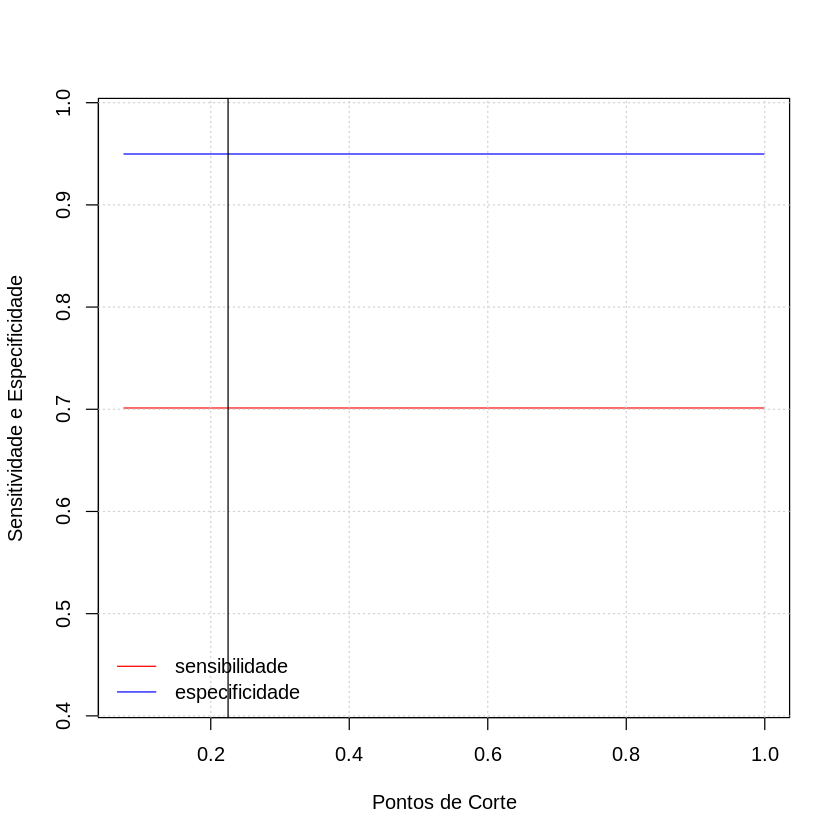

In [114]:
plot(
  y = sensitividade[1:698] , 
  x = limiares[1:698], 
  type="l", 
  col="red", 
  ylab = 'Sensitividade e Especificidade', 
  xlab= 'Pontos de Corte');
grid();
lines(y = especificidade[1:698], x = limiares[1:698], type = 'l',col="blue" 
 )
legend("bottomleft", c("sensibilidade","especificidade"),
col=c("red","blue"), lty=c(1,1),bty="n", cex=1, lwd=1)
abline(v=0.225)


In [115]:
#Obtem novamente as probabilidades para classificar baseado no ponto de corte 22,5%
Probabilidade <- predict(meu_modelo, newdata= dados,type = 'response')
Classe_Predita <- ifelse(Probabilidade > 0.225,"Boa","Ruim")

View(data.frame(dados,Probabilidade,Classe_Predita))


,Prova_Logica,Redacao,Auto_Avaliacao,Classe,Probabilidade,Classe_Predita
,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<chr>
1,2,1,1,Ruim,0.09096250,Ruim
2,2,1,1,Ruim,0.09096250,Ruim
3,5,1,1,Ruim,0.15989589,Ruim
4,5,4,1,Boa,0.60235935,Boa
5,5,3,1,Ruim,0.43140265,Boa
6,2,3,1,Ruim,0.28514808,Boa
7,3,5,1,Boa,0.66331842,Boa
8,2,5,7,Boa,0.95288247,Boa
9,1,9,1,Boa,0.95325780,Boa


In [116]:
#Visualiza matriz de confusao final
matriz_de_confusao <- table(Classe_Predita = Classe_Predita, Classe_Original = relevel(dados$Classe,ref = 'Boa'))
matriz_de_confusao 


              Classe_Original
Classe_Predita Boa Ruim
          Boa  204   75
          Ruim  37  383

In [117]:
#Armazena valores da matriz de confusao
VP_Verdadeiro_Positivo <- matriz_de_confusao[1,1];
print(paste('Verdadeiros Positivos: ' , VP_Verdadeiro_Positivo));

FN_Falso_Negativo <- matriz_de_confusao[2,1];
print(paste("Falsos Negativos     :  " , FN_Falso_Negativo));

VN_Verdadeiro_Negativo <- matriz_de_confusao[2,2];
print(paste("Verdadeiros Negativos: ", VN_Verdadeiro_Negativo));

FP_Falso_Positivo <- matriz_de_confusao[1,2];
print(paste("Falsos Positivos     :  ", FP_Falso_Positivo))

[1] "Verdadeiros Positivos:  204"
[1] "Falsos Negativos     :   37"
[1] "Verdadeiros Negativos:  383"
[1] "Falsos Positivos     :   75"


In [118]:
#Calcula acuracia
acuracia <- sum(diag(matriz_de_confusao))/ sum(matriz_de_confusao);
print(paste("Acurácia: ", acuracia * 100));

[1] "Acurácia:  83.9771101573677"


In [119]:
#Calcula Sensitividade
sensitividade <- VP_Verdadeiro_Positivo /(VP_Verdadeiro_Positivo + FN_Falso_Negativo)
print(paste("Sensitividade: ", sensitividade*100))


[1] "Sensitividade:  84.6473029045643"


In [120]:
#Calcula Especificidade
especificidade <- VN_Verdadeiro_Negativo / (VN_Verdadeiro_Negativo + FP_Falso_Positivo)
print(paste("Especificidade: ", especificidade * 100))

[1] "Especificidade:  83.6244541484716"
